# Example notebook: Classification

In this notebook we demonstrate that using the variational classifier is just as easy as using any other sklearn classifier

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from tno.quantum.ml.classifiers.vc import VariationalClassifier
from tno.quantum.ml.datasets import get_iris_dataset

X_training, y_training, X_validation, y_validation = get_iris_dataset(
    n_features=2, n_classes=2, random_seed=0
)

In [2]:
# Define classifiers
classifiers = {
    "VC": VariationalClassifier(
        batch_size=10,
        backend={"name": "default.qubit", "options": {}},
        model={
            "name": "expected_values_model",
            "options": {"n_layers": 2, "n_trainable_sublayers": 2, "scaling": 0.3},
        },
        optimizer={"name": "adam", "options": {}},
        use_bias=False,
        random_init=True,
        warm_init=False,
        random_state=2,
    ),
    "Nearest Neighbors": KNeighborsClassifier(3),
    "Linear SVM": SVC(kernel="linear", C=0.025),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
}

Training iteration: 100%|██████████████████████████████████████████████████████████████| 150/150 [00:22<00:00,  6.81it/s]


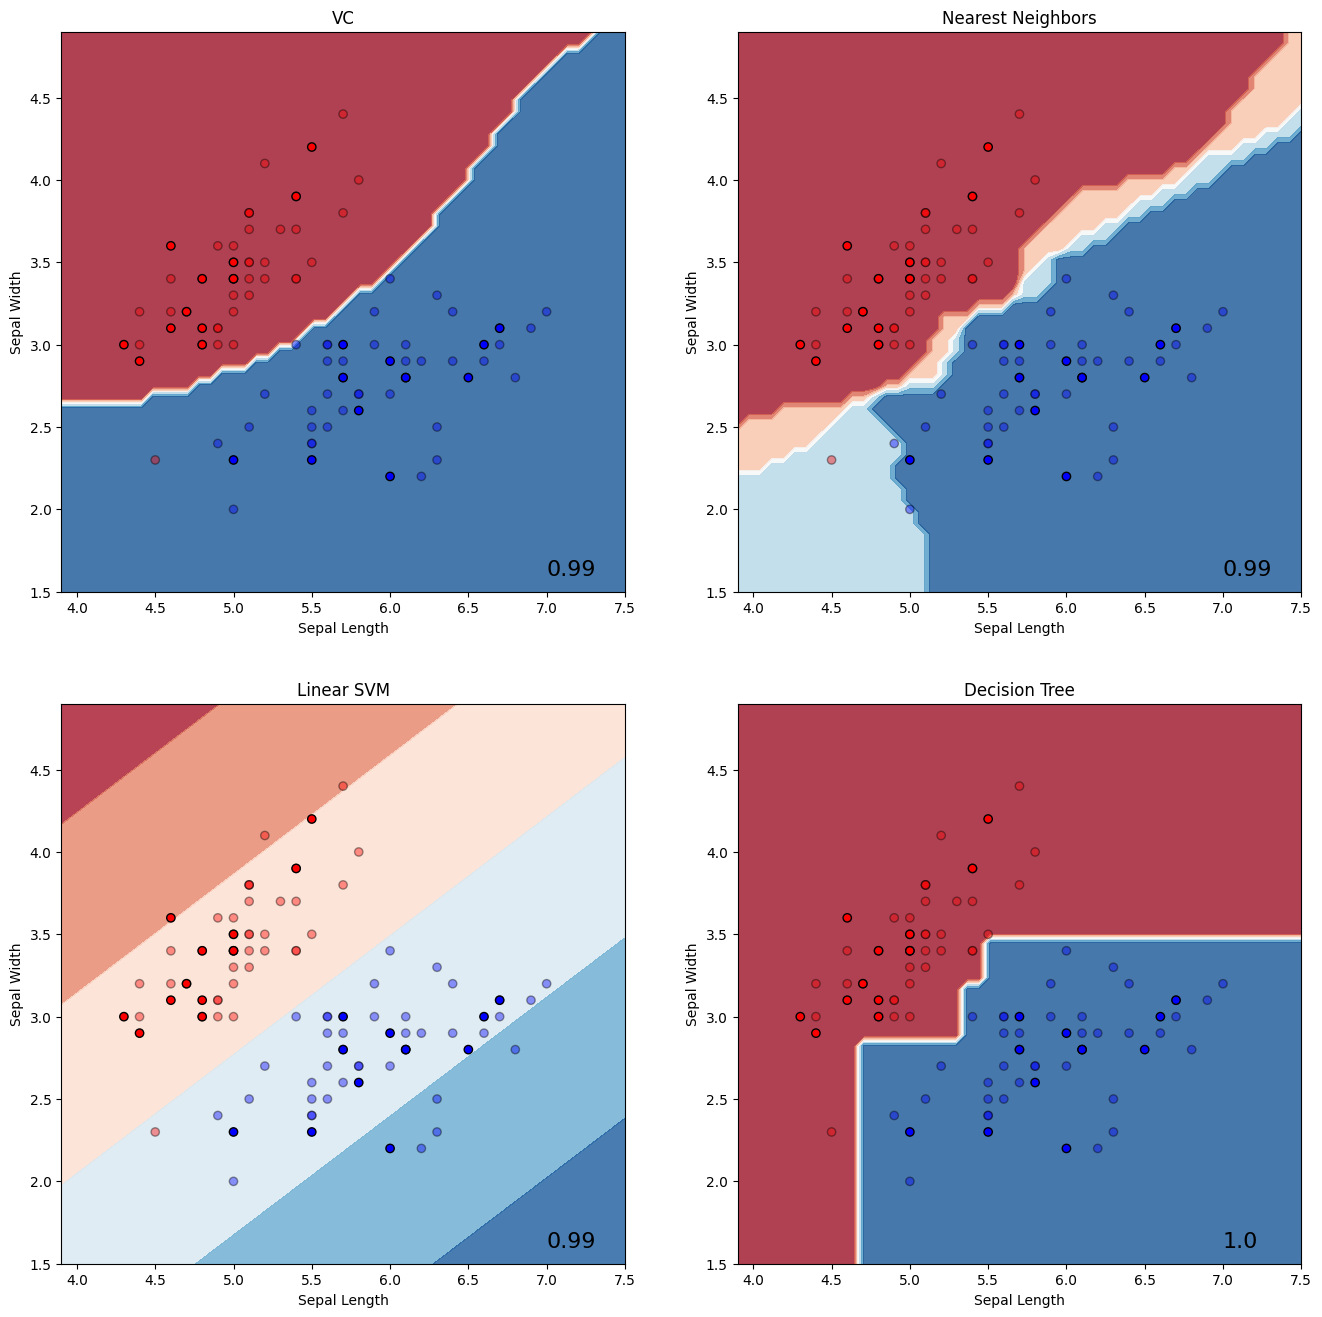

In [3]:
cmap = ListedColormap(["#FF0000", "#0000FF"])
plt.figure(figsize=(16, 16))

for i, (name, classifier) in enumerate(classifiers.items(), 1):
    ax = plt.subplot(2, 2, i)

    if name == "VC":
        classifier = make_pipeline(StandardScaler(), classifier)
        classifier.fit(X_training, y_training, variationalclassifier__n_iter=150)
    else:
        classifier = make_pipeline(StandardScaler(), classifier)
        classifier.fit(X_training, y_training)

    DecisionBoundaryDisplay.from_estimator(
        classifier,
        X_training,
        cmap=plt.cm.RdBu,
        alpha=0.8,
        ax=ax,
        eps=0.5,
        grid_resolution=50,
    )
    ax.scatter(
        X_training[:, 0],
        X_training[:, 1],
        c=y_training,
        cmap=cmap,
        edgecolors="k",
        alpha=0.4,
    )

    ax.scatter(
        X_validation[:, 0],
        X_validation[:, 1],
        c=y_validation,
        cmap=cmap,
        edgecolors="k",
    )

    score = classifier.score(X_training, y_training)
    ax.text(
        ax.get_xlim()[1] - 0.5,
        ax.get_ylim()[0] + 0.1,
        f"{score:.2}",
        size=16,
    )
    ax.set_title(name)
    ax.set_xlabel("Sepal Length")
    ax.set_ylabel("Sepal Width")